WEEK 1

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd

**TASK 1**

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Sentiment Analysis Dataset 2.csv',error_bad_lines=False)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


In [4]:
df.head()

,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [5]:
df.isnull().sum()

ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64

In [6]:
df = df.drop(['ItemID','SentimentSource'],axis=1)

**TASK 2**

In [7]:
import string

In [8]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree


In [9]:
df['without_punc']= df['SentimentText'].apply(lambda x:remove_punctuation(x))

In [10]:
import re

In [11]:
df['without_url']= df['without_punc'].apply(lambda x: re.sub(r"http\S+", "", x))

In [12]:
df['text_lower']= df['without_url'].apply(lambda x: x.lower())

In [13]:
import nltk

In [14]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")

In [15]:
df['text_tokenized']= df['text_lower'].apply(lambda x:tokenizer.tokenize(x))

In [16]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [18]:
df['without_stopword']= df['text_tokenized'].apply(lambda x:remove_stopwords(x))

In [19]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()

In [20]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['text_stemmed']=df['without_stopword'].apply(lambda x: stemming(x))

In [21]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')
nltk.download('omw-1.4')
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['text_lemmatized']=df['without_stopword'].apply(lambda x:lemmatizer(x))    

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


**TASK 3**

In [22]:
from wordcloud import WordCloud

In [23]:
no_depression =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 0]])
depression =' '.join([text for text in df['SentimentText'][df['Sentiment'] == 1]])
overall = depression + no_depression

In [24]:
wordcloud_overall = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(overall)

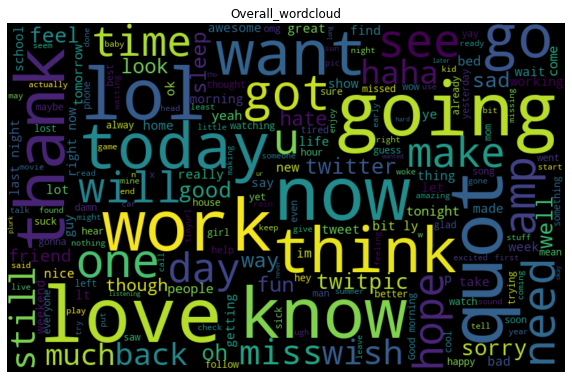

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_overall, interpolation="bilinear")
plt.axis('off')
plt.title('Overall_wordcloud')
plt.show()

In [27]:
depression_wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(depression)
no_depression_wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(no_depression)

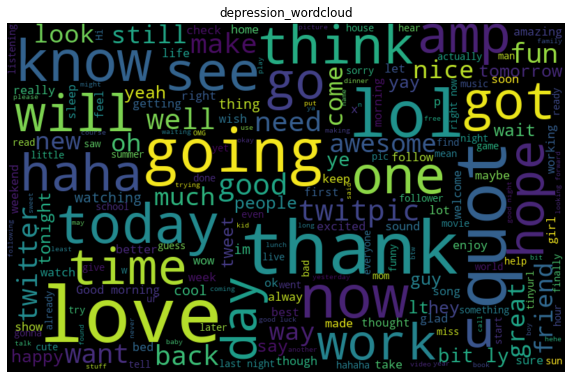

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(depression_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('depression_wordcloud')
plt.show()

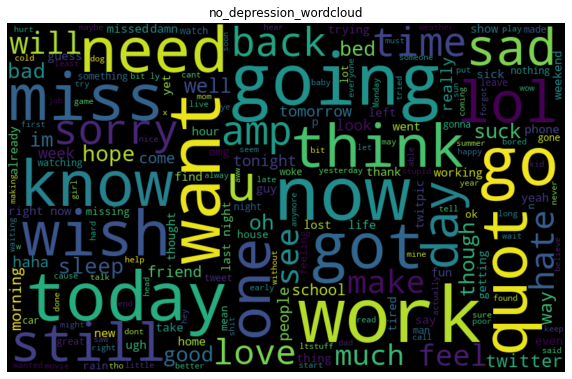

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.imshow(no_depression_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('no_depression_wordcloud')
plt.show()

In [31]:
df['length'] = df['SentimentText'].str.len()

In [32]:
df.groupby('Sentiment').describe()

length                                                     
              count       mean        std  min   25%   50%    75%    max
Sentiment                                                               
0          788435.0  75.034650  36.376003  6.0  45.0  70.0  105.0  359.0
1          790177.0  74.222823  35.890029  6.0  44.0  69.0  103.0  374.0

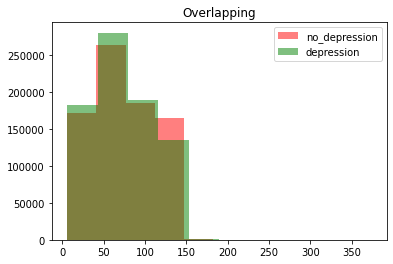

In [33]:
plt.hist(df['length'][df['Sentiment'] == 0],alpha = 0.5 ,label='no_depression',color='red')
plt.hist(df['length'][df['Sentiment'] == 1], alpha = 0.5,label='depression',color='green')
  
plt.legend(loc='upper right')
plt.title('Overlapping')
plt.show()

In [34]:
import seaborn as sns 

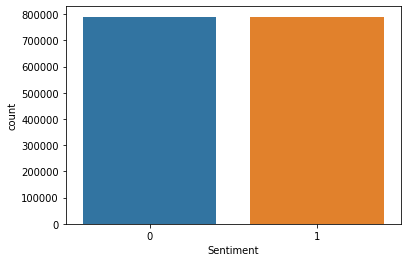

In [35]:
sns.countplot(x='Sentiment',data=df)  

In [36]:
df[df['Sentiment']== 0].head()

,Sentiment,SentimentText,without_punc,without_url,text_lower,text_tokenized,without_stopword,text_stemmed,text_lemmatized,length
0,0,is so sad for my APL frie...,is so sad for my APL friend,is so sad for my APL friend,is so sad for my apl friend,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]",61
1,0,I missed the New Moon trail...,I missed the New Moon trailer,I missed the New Moon trailer,i missed the new moon trailer,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[missed, new, moon, trailer]",51
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy Ive be...,Omgaga Im sooo im gunna CRy Ive be...,omgaga im sooo im gunna cry ive be...,"[omgaga, im, sooo, im, gunna, cry, ive, been, ...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...","[omgaga, im, sooo, im, gunna, cri, ive, dentis...","[omgaga, im, sooo, im, gunna, cry, ive, dentis...",132
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me TT,i think mi bf is cheating on me TT,i think mi bf is cheating on me tt,"[i, think, mi, bf, is, cheating, on, me, tt]","[think, mi, bf, cheating, tt]","[think, mi, bf, cheat, tt]","[think, mi, bf, cheating, tt]",53
5,0,or i just worry too much?,or i just worry too much,or i just worry too much,or i just worry too much,"[or, i, just, worry, too, much]","[worry, much]","[worri, much]","[worry, much]",42


In [37]:
df[df['Sentiment']== 1].head()

,Sentiment,SentimentText,without_punc,without_url,text_lower,text_tokenized,without_stopword,text_stemmed,text_lemmatized,length
2,1,omg its already 7:30 :O,omg its already 730 O,omg its already 730 O,omg its already 730 o,"[omg, its, already, 730, o]","[omg, already, 730]","[omg, alreadi, 730]","[omg, already, 730]",37
6,1,Juuuuuuuuuuuuuuuuussssst Chillin!!,Juuuuuuuuuuuuuuuuussssst Chillin,Juuuuuuuuuuuuuuuuussssst Chillin,juuuuuuuuuuuuuuuuussssst chillin,"[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]","[juuuuuuuuuuuuuuuuussssst, chillin]",41
8,1,handed in my uniform today . i miss you ...,handed in my uniform today i miss you a...,handed in my uniform today i miss you a...,handed in my uniform today i miss you a...,"[handed, in, my, uniform, today, i, miss, you,...","[handed, uniform, today, miss, already]","[hand, uniform, today, miss, alreadi]","[handed, uniform, today, miss, already]",53
9,1,hmmmm.... i wonder how she my number @-),hmmmm i wonder how she my number,hmmmm i wonder how she my number,hmmmm i wonder how she my number,"[hmmmm, i, wonder, how, she, my, number]","[hmmmm, wonder, number]","[hmmmm, wonder, number]","[hmmmm, wonder, number]",46
11,1,thanks to all the haters up in my face a...,thanks to all the haters up in my face a...,thanks to all the haters up in my face a...,thanks to all the haters up in my face a...,"[thanks, to, all, the, haters, up, in, my, fac...","[thanks, haters, face, day, 112102]","[thank, hater, face, day, 112102]","[thanks, hater, face, day, 112102]",61


In [38]:
df[df['Sentiment'] == 0].max()

Sentiment                                                           0
SentimentText       ï¿½s wishing it was nightime+ that she war mak...
without_punc                                  ï¿½ï¿½  CE d grademock 
without_url                                   ï¿½ï¿½  CE d grademock 
text_lower          ùˆù†ø§ø§ø§ø§ø³ù‡ ø§ø¬ù„ ùùš ù…ø¤øªù…ø± ù„ø§ø¨ù...
text_tokenized      [ž, œ, ª, ª, i, hate, poor, hebrew, support, i...
without_stopword    [ž, œ, ª, ª, hate, poor, hebrew, support, twhirl]
text_stemmed        [ž, œ, ª, ª, hate, poor, hebrew, support, twhirl]
text_lemmatized     [ž, œ, ª, ª, hate, poor, hebrew, support, twhirl]
length                                                            359
dtype: object

In [39]:
df[df['Sentiment'] == 1].max()

Sentiment                                                           1
SentimentText       ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Øœï¿...
without_punc        ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Øœï¿...
without_url         ï¿½ï¿½ï¿½ï¿½ï¿½ß§ï¿½Ç¿ï¿½ï¿½ï¿½ï¿½ï¿½Ð¶ï¿½Øœï¿...
text_lower          ùƒùˆùƒø§ ùƒùˆù„ø§  ù…øªø¹ø© ø§ù„ùƒùˆù„ø§      ...
text_tokenized         [œ, ž, its, the, best, nickname, i, ever, had]
without_stopword                         [œ, ž, best, nickname, ever]
text_stemmed                              [œ, ž, best, nicknam, ever]
text_lemmatized                          [œ, ž, best, nickname, ever]
length                                                            374
dtype: object